In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
from sklearn import metrics

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_raw = pd.read_csv("/home/swarnadeep/Documents/Courses/2nd_Sem/AML/Jupyter_Notebooks/advertising-data/Advertising.csv")

In [7]:
df_raw.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df_filter = df_raw.drop(['Unnamed: 0'],axis=1)

In [9]:
df_filter.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
import seaborn as sns

Printing the Scatter Plots for the Various Advertising agents:


/home/swarnadeep/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


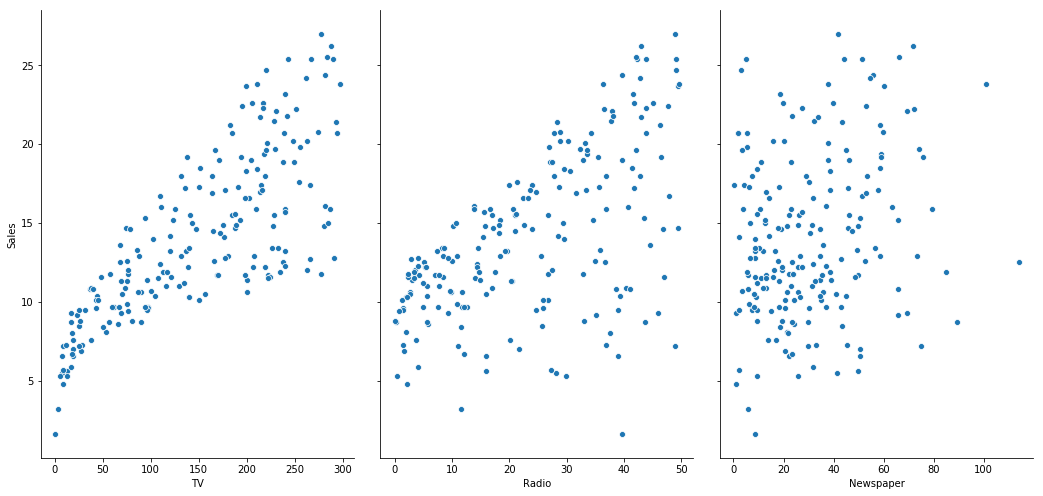

In [11]:
print("Printing the Scatter Plots for the Various Advertising agents:")
sns.pairplot(df_raw, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

# Evaluation of Model Using Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

# Model Including Newspaper

In [13]:
X=df_filter[['TV','Radio','Newspaper']]

In [14]:
y=df_filter['Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_tey_train_encoded.head()st is {}".format(X_test.shape, y_test.shape))

Shape of X is (200, 3)
Shape of X_train is (150, 3) and shape of y_train is (150,)
Shape of X_test is (50, 3) and shape of y_tey_train_encoded.head()st is (50,)


In [17]:
X_train.head()

,TV,Radio,Newspaper
114,78.2,46.8,34.5
173,168.4,7.1,12.8
5,8.7,48.9,75.0
126,7.8,38.9,50.6
117,76.4,0.8,14.8


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
y_predicted = model.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.697063266379363


In [22]:
from sklearn.model_selection import cross_val_score

ln_model = LinearRegression()
cv_scores = cross_val_score(ln_model, X=X_train, y=y_train, cv=4, n_jobs=3)
print(cv_scores)


[0.81786737 0.93397513 0.90812271 0.83972763]


# Model Excluding News-paper

In [23]:
X_tv_radio=df_filter[['TV','Radio']]

In [24]:
X_tv_radio_train, X_tv_radio_test, y_train, y_test = train_test_split(X_tv_radio, y, random_state=42)

In [25]:
X_tv_radio_train, X_tv_radio_test, y_train, y_test = train_test_split(X_tv_radio, y, random_state=42)

In [26]:
tv_radio_model = LinearRegression()

In [27]:
tv_radio_model.fit(X_tv_radio_train,y_train)
sales_tv_radio_predicted = tv_radio_model.predict(X_tv_radio_test)

In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test, sales_tv_radio_predicted)))

1.6893770318599999


The Least Squares Line for TV


/home/swarnadeep/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


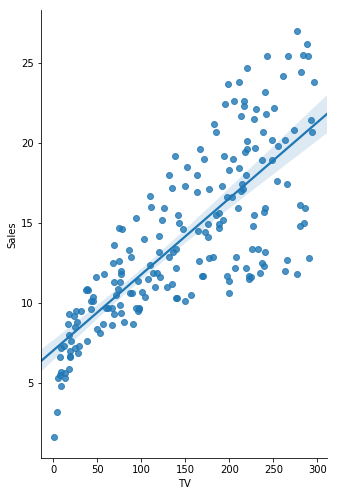

In [29]:
print("The Least Squares Line for TV")
sns.pairplot(df_raw, x_vars=['TV'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

The Least Squares Line for Radio


/home/swarnadeep/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


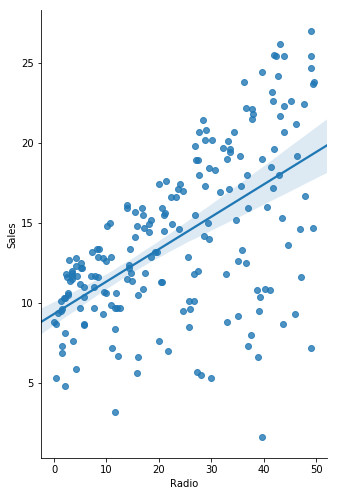

In [30]:
print("The Least Squares Line for Radio")
sns.pairplot(df_raw, x_vars=['Radio'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

The Least Squares Line for Newspaper


/home/swarnadeep/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


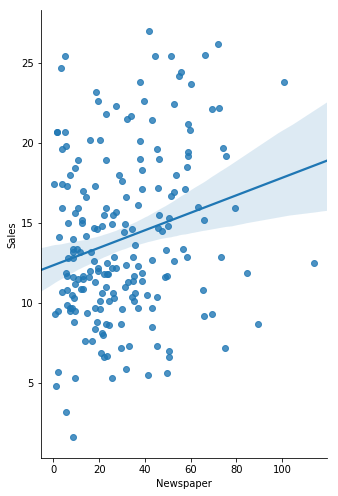

In [31]:
print("The Least Squares Line for Newspaper")
sns.pairplot(df_raw, x_vars=['Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [32]:
import statsmodels.api as sm

# Multiple Linear Regression On Two Variables

In [33]:
X_tv_newspaper=df_filter[['TV','Newspaper']]

In [34]:
#predicting using stats models and printing the result scores as report
#statsmodels is imported as sm
tv_news_sales = sm.OLS(y, X_tv_newspaper).fit()
#print model summmary
tv_news_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1332.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          1.44e-115
Time:                        13:04:32   Log-Likelihood:                -557.72
No. Observations:                 200   AIC:                             1119.
Df Residuals:                     198   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0664      0.002     28.032      0.000       0.062       0.071
Newspaper      0.1058      0.011      9.836      0.000       0.085       0.127
==============================================================================
Omnibus:                       16.291   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                          -0.678   Prob(JB):                     0.000136
Kurtosis:                       3.546   Cond. No.                         6.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X_radio_news=df_filter[['Radio','Newspaper']]

In [36]:
#predicting using stats models and printing the result scores as report
#statsmodels is imported as sm
radio_news_sales = sm.OLS(y, X_radio_news).fit()
#print model summmary
radio_news_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     487.9
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           3.02e-77
Time:                        13:04:32   Log-Likelihood:                -646.85
No. Observations:                 200   AIC:                             1298.
Df Residuals:                     198   BIC:                             1304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Radio          0.3763      0.026     14.334      0.000       0.325       0.428
Newspaper      0.1024      0.019      5.303      0.000       0.064       0.140
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.382
Skew:                          -1.137   Prob(JB):                     2.56e-12
Kurtosis:                       4.110   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#predicting using stats models and printing the result scores as report
#statsmodels is imported as sm
tv_radio_sales = sm.OLS(y, X_tv_radio).fit()
#print model summmary
tv_radio_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5206.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          6.73e-172
Time:                        13:04:32   Log-Likelihood:                -426.71
No. Observations:                 200   AIC:                             857.4
Df Residuals:                     198   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0548      0.001     42.962      0.000       0.052       0.057
Radio          0.2356      0.008     29.909      0.000       0.220       0.251
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.829
Skew:                          -0.112   Prob(JB):                       0.0121
Kurtosis:                       4.005   Cond. No.                         9.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Linear Regression On Three Variables

In [38]:
#predicting using stats models and printing the result scores as report
#statsmodels is imported as sm
tv_radio_news_sales = sm.OLS(y, X).fit()
#print model summmary
tv_radio_news_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          2.43e-171
Time:                        13:04:33   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Simple Linear Regression On Each Factor Seperately

In [39]:
X_tv=df_filter[['TV']]

In [40]:
#predicting using stats models and printing the result scores as report
#statsmodels is imported as sm
tv_sales = sm.OLS(y, X_tv).fit()
#print model summmary
tv_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1733.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          3.52e-100
Time:                        13:04:33   Log-Likelihood:                -597.51
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     199   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_radio=df_filter[['Radio']]

In [42]:
#predicting using stats models and printing the result scores as report
#statsmodels is imported as sm
radio_sales = sm.OLS(y, X_radio).fit()
#print model summmary
radio_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     834.0
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.27e-73
Time:                        13:04:33   Log-Likelihood:                -660.13
No. Observations:                 200   AIC:                             1322.
Df Residuals:                     199   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Radio          0.4873      0.017     28.879      0.000       0.454       0.521
==============================================================================
Omnibus:                       29.193   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.013
Skew:                          -1.014   Prob(JB):                     9.18e-09
Kurtosis:                       3.577   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_news=df_filter[['Newspaper']]

In [44]:
#predicting using stats models and printing the result scores as report
#statsmodels is imported as sm
news_sales = sm.OLS(y, X_news).fit()
#print model summmary
news_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     379.9
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.98e-48
Time:                        13:04:33   Log-Likelihood:                -718.04
No. Observations:                 200   AIC:                             1438.
Df Residuals:                     199   BIC:                             1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Newspaper      0.3232      0.017     19.492      0.000       0.291       0.356
==============================================================================
Omnibus:                       10.866   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.018
Skew:                          -0.418   Prob(JB):                      0.00149
Kurtosis:                       3.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""